# <center>Regressão Linear OLS - Valor da Fatura de Cartão de Credíto

<br>
<img src="figuras/cartoes.jpg">
<br>


## 01. Introdução

<b>Objetivo</b>: 

Analisar um conjunto de dados composto por informações de 400 portadores de cartão de crédito e compreender quais fatores influenciam a Fatura do Cartão de Crédito de um portador de cartão. Não está incluso no objetivo do projeto fazer qualquer tipo de previsão sobre os dados.

Os resultados da análise podem determinar quais clientes apresentam risco de inadimplência de crédito ou qual será o comportamento esperado do consumidor de clientes em potencial. Além disso, combinar os dados de fatura do cartão de crédito com informações como Limite de crédito pode ajudar no cálculo da utilização de crédito de um cartão.

<b>Método</b>:

O método utilizado será uma Regressão Linear OLS, que é um método de estimação usado em estatística para encontrar os parâmetros que minimizam a soma dos quadrados das diferenças entre os valores observados e os valores estimados em um modelo de regressão linear. Com base nesses parâmetros, é possível examinar a relação linear entre as variáveis, uma das quais é considerada a variável dependente e as demais são consideradas variáveis independentes.

Para que a o resultado da nossa regressão tenha significância estatístisca, analisaremos os pressupostos que uma regressão linear necessita respeitar, são eles:

- <b>Linearidade<b/>
- <b>Multicolinearidade<b/>
- <b>Homocedasticidade<b/>
- <b>Resíduo versus variável independente<b/>
- <b>Autocorreção dos resíduos</b>
- <b>Distribuição normal dos resíduos</b>

    



Variáveis do conjunto de dados:

- <b>ID</b> - Identificação
- <b>Income</b> - Renda em milhares de dólares (1.000 dol)
- <b>Limit</b> - Limite de Crédito
- <b>Rating</b> - Classificação de crédito
- <b>Cards</b> - Número de cartões de crédito
- <b>Age</b> - Idade em anos
- <b>Education</b> - número de anos de estudo
- <b>Own</b> - Possui casa? Sim ou Não
- <b>Student</b> - Sim ou Não
- <b>Married</b> - Sim ou Não
- <b>Region</b> - Leste, Sul e Oeste indicando a localização geográfica do indivíduo
- <b>Balance</b> - Fatura média do cartão de crédito em $

## 02. Importando Bibliotecas e Carregando os Dados

In [1]:
# Bibliotecas para manipular dados
import pandas as pd
import numpy as np

# Bibliotecas de gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Pacote para imputadação de dados discrepantes
from sklearn.impute import KNNImputer

# Bibliotecas para regressão
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Bilbioteca para padronização
from sklearn.preprocessing import StandardScaler

# Biblioteca para medir a multicoliearidade
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Bibliotecas para Testes estatísticos
from scipy import stats
from statsmodels.stats.stattools import durbin_watson

# Ignorando warnings
import warnings

warnings.filterwarnings("ignore")

# Padronização do código
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
# Visualizar o dataframe
df = pd.read_csv("Credit.csv")
df.head()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,No,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
2,104.593,7075,514,4,71,11,No,No,No,West,580
3,148.924,9504,681,3,36,11,Yes,No,No,West,964
4,55.882,4897,357,2,68,16,No,No,Yes,South,331


<IPython.core.display.Javascript object>

In [3]:
# Fazendo uma cópia do dataframe para deixar o original intacto
credit_card = df.copy()

<IPython.core.display.Javascript object>

## 03. Explorando os Dados

In [4]:
# Visualizar o tamnho do dataframe
print("Registros:", credit_card.shape[0])
print("Variáveis:", credit_card.shape[1])

Registros: 400
Variáveis: 11


<IPython.core.display.Javascript object>

In [5]:
# Visualizar os tipos das varíaveis
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Own        400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Region     400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


<IPython.core.display.Javascript object>

In [6]:
# Verificar valores nulos
credit_card.isnull().sum()

Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Own          0
Student      0
Married      0
Region       0
Balance      0
dtype: int64

<IPython.core.display.Javascript object>

## 04. EDA

In [7]:
# Compreendendo a variável target
mean_balance = credit_card["Balance"].mean()
median_balance = credit_card["Balance"].median()

print("Média do valor das faturas:", mean_balance)
print("Mediana do valor das faturas:", median_balance)

Média do valor das faturas: 520.015
Mediana do valor das faturas: 459.5


<IPython.core.display.Javascript object>

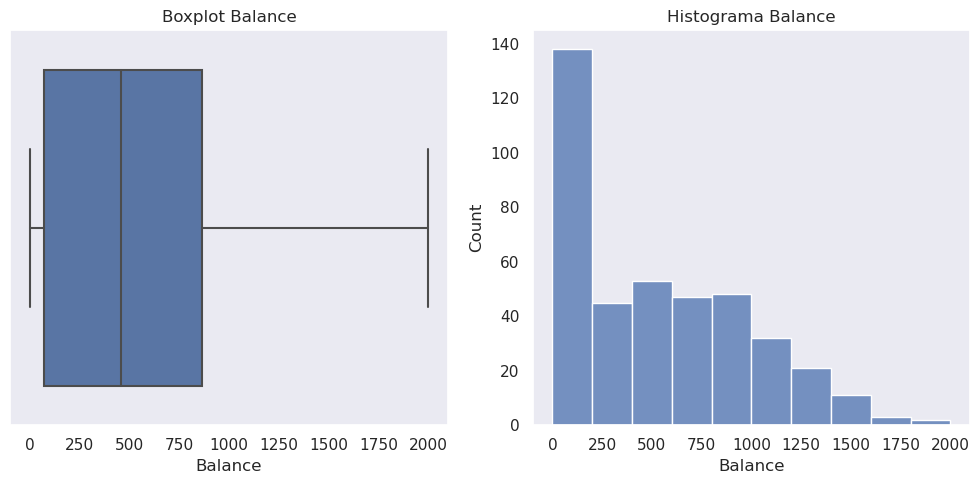

<IPython.core.display.Javascript object>

In [8]:
# Visualizando o boxplot e a distribuição da variável target
sns.set_theme()
sns.set_style("dark")

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(credit_card["Balance"], ax=ax[0]).set_title("Boxplot Balance")
sns.histplot(df["Balance"], ax=ax[1]).set_title("Histograma Balance")

fig.tight_layout()

Insights:

- A variável target não possui valores discrepantes.
- A distribuição da variável target possui uma distribuição assimétrica positiva.

Vamos criar uma variável chamada de balance_value, que vai possui apenas duas categorias, alto e baixo. Para caculá-la vamos utilizar a mediana da variável Balance, valores acima da mediana serão registrados como alto na nova variável, valores abaixo da mediana serão registrados como baixo. 

A escolha da mediana e não da média, se deu pela distribuição da variável Balance, que é assimétrica, mesmo a variável não possuindo valores discrepantes. 

Faremos nosso EDA baseado nesta nova variável

In [9]:
# Criando nova variável

credit_card["Balance_value"] = np.where(
    df["Balance"] > df["Balance"].median(), "alto", "baixo"
)

<IPython.core.display.Javascript object>

Agora temos 200 valores considerados baixos e 200 valores considerados altos para as faturas de cartão de crédito.

#### Variável Income

In [10]:
# Calculando a média de renda para os dois grupos
credit_card.groupby("Balance_value")["Income"].mean()

Balance_value
alto     56.07785
baixo    34.35992
Name: Income, dtype: float64

<IPython.core.display.Javascript object>

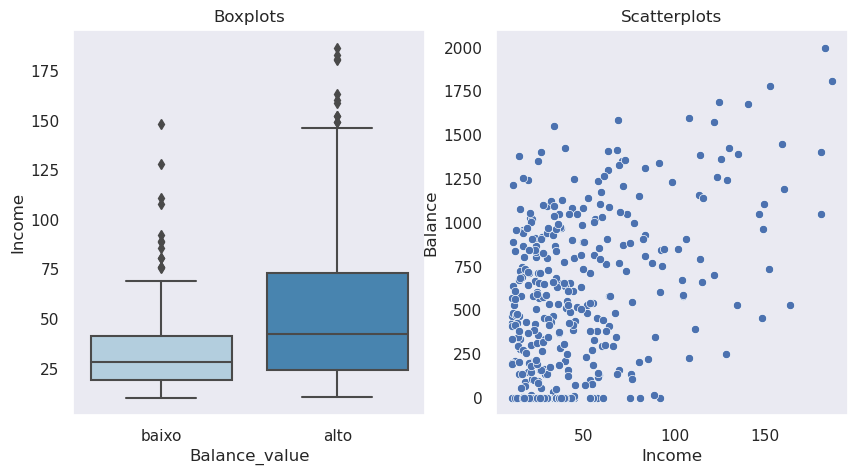

<IPython.core.display.Javascript object>

In [11]:
# Plotando boxplot e histograma da variável Income
sns.set_style("dark")

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(
    x="Balance_value", y="Income", data=credit_card, ax=ax[0], palette="Blues"
).set_title("Boxplots")
sns.scatterplot(x="Income", y="Balance", data=credit_card, ax=ax[1]).set_title(
    "Scatterplots"
)

plt.show()

Isngihts:
    
- A renda parece impactar diretamente no valor da fatura do cartão de crédito. A média de renda do grupo que possui altos gastos com o cartão é mais alta que a média de renda do grupo que possui baixos gastos. 


- Os dois grupos possuem valores discrepantes.


- Através do scatterplot é possível perceber uma alta correlação entre as duas variáveis.


#### Variável Limit

In [12]:
# Calculando a média de limite para os dois grupos
credit_card.groupby("Balance_value")["Limit"].mean()

Balance_value
alto     6362.74
baixo    3108.46
Name: Limit, dtype: float64

<IPython.core.display.Javascript object>

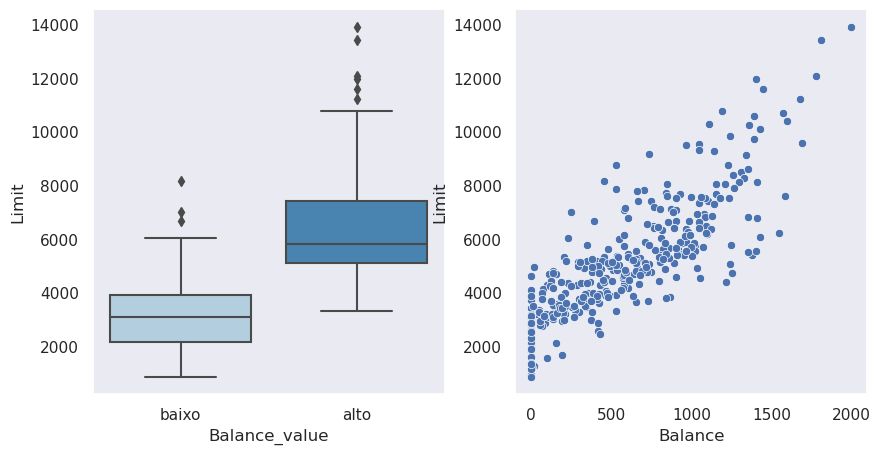

<IPython.core.display.Javascript object>

In [13]:
# Plotando boxplot e histograma da variável Limit
sns.set_style("dark")

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(x="Balance_value", y="Limit", data=credit_card, ax=ax[0], palette="Blues")
sns.scatterplot(x="Balance", y="Limit", data=credit_card, ax=ax[1])

plt.show()

Insights:

- A variável Limit também parece impactar no valor da fatura do cartão. O grupo que possui alto gasto no cartão possui uma média de limite maior que o dobro do grupo que possui baixo valor nas faturas. 


- Os dois grupos possuem valores discrepantes.


- A variável possui uma forte correlação com a variável target.


#### Variável Rating

In [14]:
# Calculando a média do rating para os dois grupos
credit_card.groupby("Balance_value")["Rating"].mean()

Balance_value
alto     463.84
baixo    246.04
Name: Rating, dtype: float64

<IPython.core.display.Javascript object>

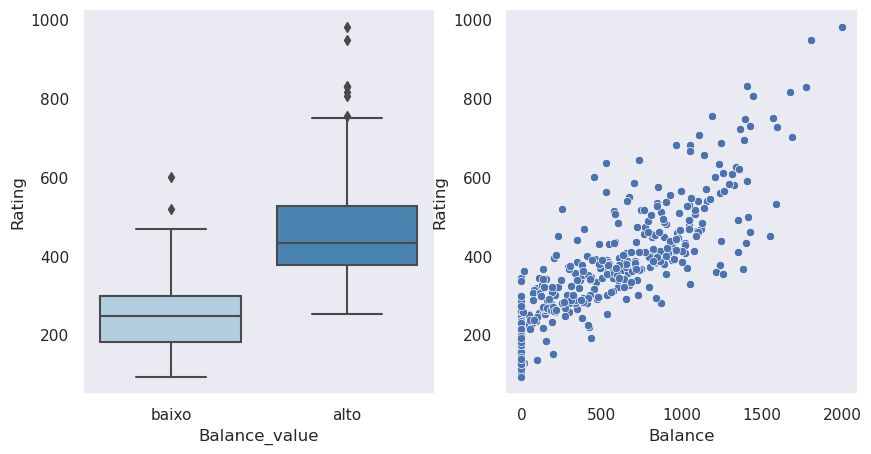

<IPython.core.display.Javascript object>

In [15]:
# Plotando boxplot e histograma da variável Rating
sns.set_style("dark")

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(x="Balance_value", y="Rating", data=credit_card, ax=ax[0], palette="Blues")
sns.scatterplot(x="Balance", y="Rating", data=credit_card, ax=ax[1])

plt.show()

Insgiths:

- A variável Rating é fortemente correlacionada com a variável Limit, por isso as duas possuem um comportamento bem semelhante. É provável que um rating alto de um limite maior ao cliente, ou vice-versa.


- Os dois grupos possuem valores discrepantes.



- Temos que dar atenção a esta forte correlação entre as duas variáveis independentes, uma opção é excluir uma delas no momento de modelar a regressão. 

#### Variável Age

In [16]:
# Calculando a média do age para os dois grupos
credit_card.groupby("Balance_value")["Age"].mean()

Balance_value
alto     55.155
baixo    56.180
Name: Age, dtype: float64

<IPython.core.display.Javascript object>

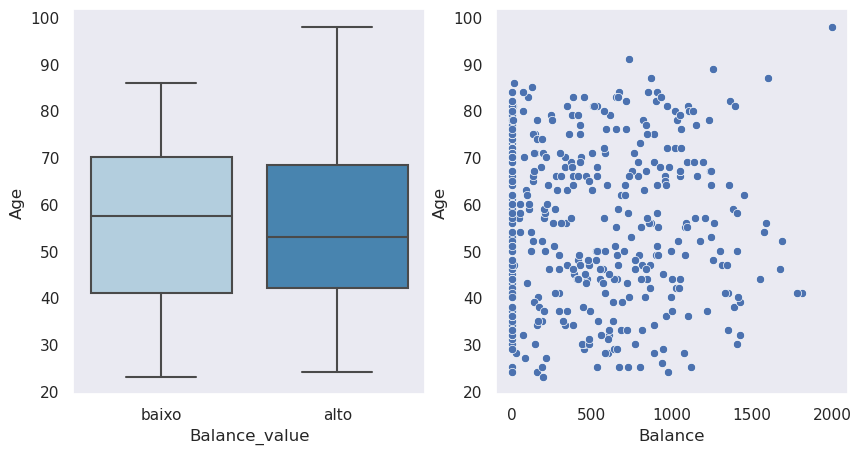

<IPython.core.display.Javascript object>

In [17]:
# Variável Age
sns.set_style("dark")

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(x="Balance_value", y="Age", data=credit_card, ax=ax[0], palette="Blues")
sns.scatterplot(x="Balance", y="Age", data=credit_card, ax=ax[1])

plt.show()

Para uma melhor compreensão da variável, vamos criar uma nova variável chamada de faixa etaria. Esta variável vai conter três intervalos de idades diferentes: jovens, adultos e terceira_idade.

In [18]:
# Analisando a variável Age por faixa etária
faixa_etaria = []

for value in df["Age"]:
    if value < 30:
        faixa_etaria.append("jovem")
    elif 30 <= value <= 60:
        faixa_etaria.append("adulto")
    else:
        faixa_etaria.append("terceira_idade")

credit_card["faixa_etaria"] = faixa_etaria

<IPython.core.display.Javascript object>

In [19]:
# Calculando a média de fatura para cada faixa_etaria
credit_card.groupby("faixa_etaria")["Balance"].mean()

faixa_etaria
adulto            535.766667
jovem             519.291667
terceira_idade    500.192771
Name: Balance, dtype: float64

<IPython.core.display.Javascript object>

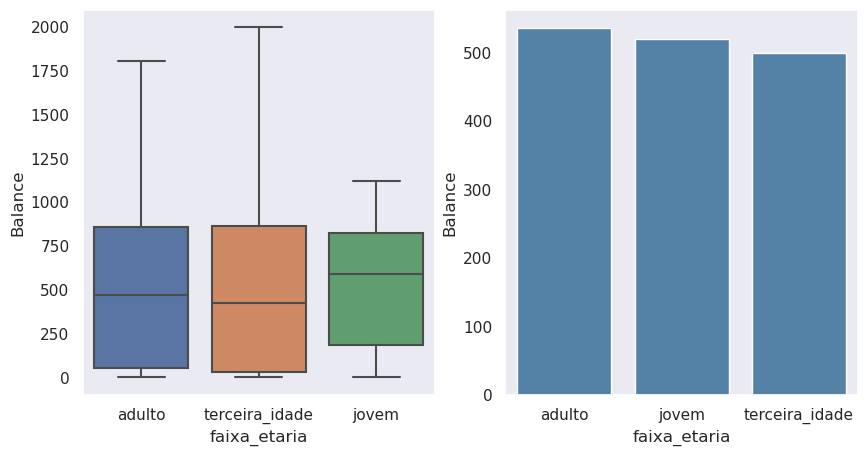

<IPython.core.display.Javascript object>

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

faixa_etaria_media = pd.DataFrame(
    credit_card.groupby("faixa_etaria")["Balance"].mean()
).reset_index()


sns.boxplot(x="faixa_etaria", y="Balance", data=credit_card, ax=ax[0])
ax = sns.barplot(
    x="faixa_etaria", y="Balance", data=faixa_etaria_media, color="steelblue", ax=ax[1]
)

plt.show()

Insgiths:

- Quando nos referimos aos dois grupos de categoria de valor de fatura, alto e baixo, percebemos que os dois grupos possuem médias de idade muito semelhantes, por volta dos 55 e 56 anos.


- Parece haver uma correlação fraca entre a variável Age e a variável target.


- Quando analisamos por faixa etária, percebemos que a média do valor da fatura dos adultos é mais alta, seguida pelos jovens e pela terceira idade.

#### Variável Cards

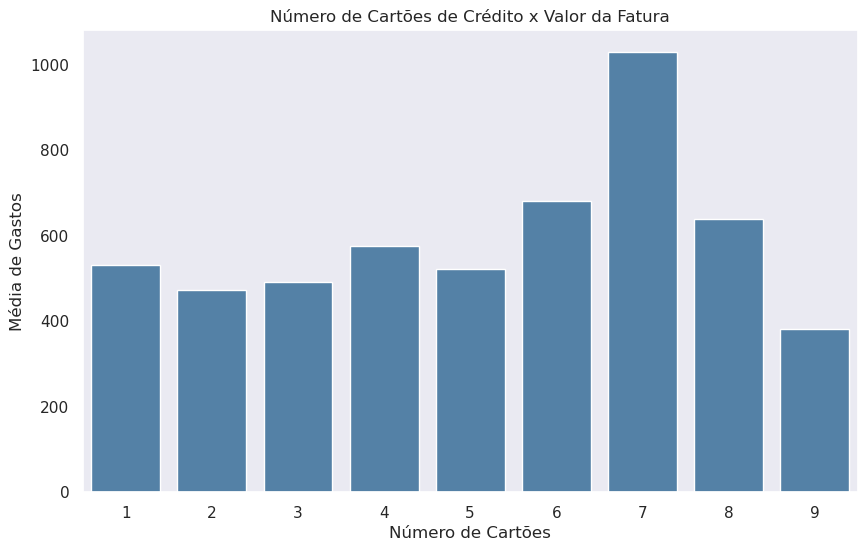

<IPython.core.display.Javascript object>

In [21]:
# Analisando a variável cards

plt.figure(figsize=(10, 6))

balance_cards = pd.DataFrame(
    credit_card.groupby("Cards")["Balance"].mean()
).reset_index()

ax = sns.barplot(x="Cards", y="Balance", data=balance_cards, color="steelblue")
ax.set_title("Número de Cartões de Crédito x Valor da Fatura")
ax.set_ylabel("Média de Gastos")
ax.set_xlabel("Número de Cartões")

plt.show()

Insights:
    
Parece que quanto maior for o número de cartões que o cliente tiver, maior tende a ser sua fatura média. Uma vez que os clientes que possuem 7 cartões são os que também possuem a maior média de gastos, seguido por aqueles que possuem 6 cartões e depois por quem possui 8 cartões.  

#### Variável Education

In [22]:
# Calculando a média de Education para os dois grupos
credit_card.groupby("Balance_value")["Education"].mean()

Balance_value
alto     13.385
baixo    13.515
Name: Education, dtype: float64

<IPython.core.display.Javascript object>

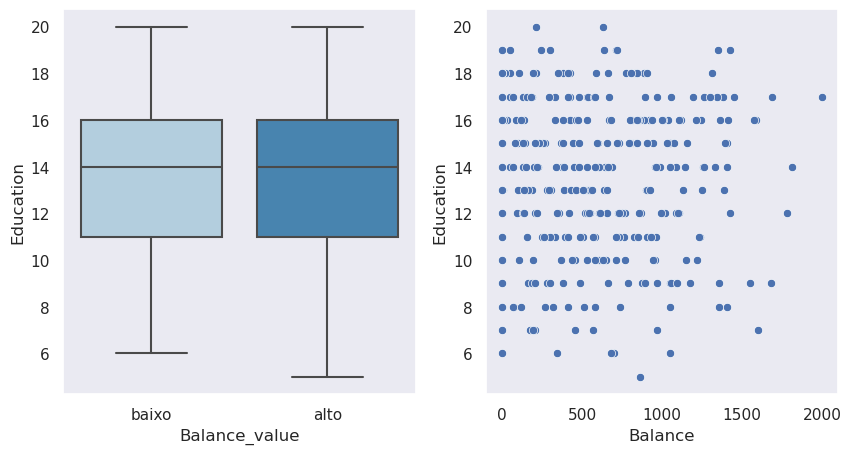

<IPython.core.display.Javascript object>

In [23]:
# Variável Education
sns.set_style("dark")

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(
    x="Balance_value", y="Education", data=credit_card, ax=ax[0], palette="Blues"
)
sns.scatterplot(x="Balance", y="Education", data=credit_card, ax=ax[1])

plt.show()

Assim como fizemos com a varíagel Age, vamos transformar a variável Education em faixas para compreender melhor a variável. Teremos 4 faixas distintas: pouco_estudo, medio_estudo, muito_estudo.

In [24]:
# Analisando a variável Age por faixa etária
faixa_educacao = []

for value in df["Education"]:
    if value < 7:
        faixa_educacao.append("pouco_estudo")
    elif 7 <= value <= 13:
        faixa_educacao.append("medio_estudo")
    else:
        faixa_educacao.append("muito_estudo")

credit_card["faixa_educacao"] = faixa_educacao

<IPython.core.display.Javascript object>

In [25]:
# Calculando a média de fatura para cada faixa_educacao
credit_card.groupby("faixa_educacao")["Balance"].mean()

faixa_educacao
medio_estudo    509.089385
muito_estudo    526.702326
pouco_estudo    606.333333
Name: Balance, dtype: float64

<IPython.core.display.Javascript object>

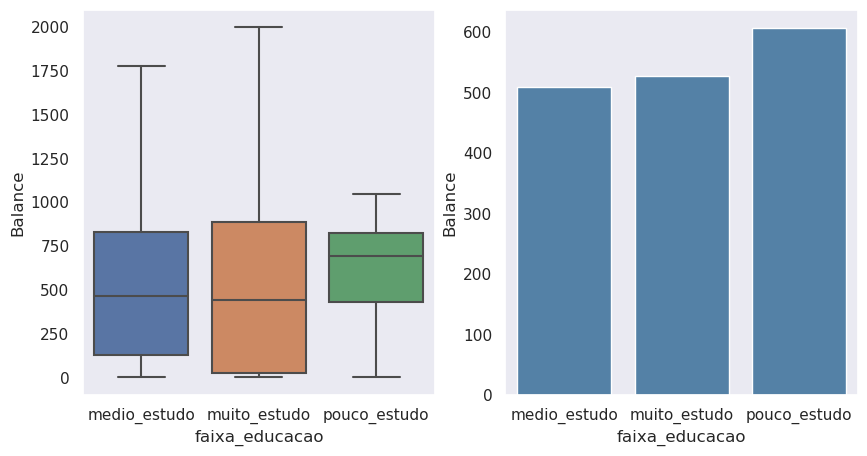

<IPython.core.display.Javascript object>

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

faixa_etaria_media = pd.DataFrame(
    credit_card.groupby("faixa_educacao")["Balance"].mean()
).reset_index()


sns.boxplot(x="faixa_educacao", y="Balance", data=credit_card, ax=ax[0])
ax = sns.barplot(
    x="faixa_educacao",
    y="Balance",
    data=faixa_etaria_media,
    color="steelblue",
    ax=ax[1],
)

plt.show()

Insights:

- Ao comparar a média dos dois grupos (faturas altas e faturas baixas) da variável Education, o valor dos dois é muito próximo, próximo a 13 anos de estudo. 


- Não é possível perceber uma correlação entre Education e variável target.


- Quando analisamos por faixa de educação, percebemos que o grupo que possui uma média de gastos mais alta no cartão é o grupo com pouco estudo, seguido pelo grupo com muito estudo e por fim, pelo grupo com medio estudo. 

#### Variável Own

In [27]:
# Calculando a média de fatura para quem possui imóvel e quem não possui
df.groupby("Own")["Balance"].mean()

Own
No     509.803109
Yes    529.536232
Name: Balance, dtype: float64

<IPython.core.display.Javascript object>

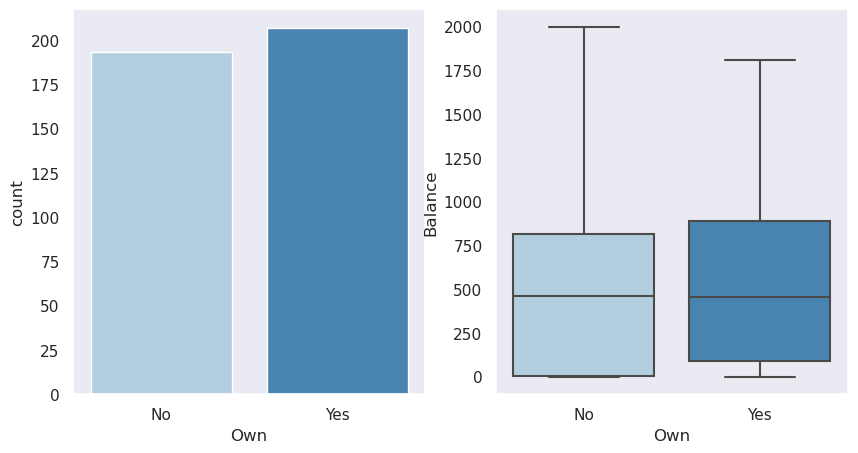

<IPython.core.display.Javascript object>

In [28]:
# Variável Own
sns.set_style("dark")

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.countplot(x="Own", data=credit_card, palette="Blues", ax=ax[0])
sns.boxplot(y="Balance", x="Own", data=credit_card, palette="Blues", ax=ax[1])

plt.show()

Insights:
    
- É possível perceber que pessoas que possuem imóvel possuem uma média de gastos um pouco mais alta com relação aqueles que não possuem.

#### Variável Married

In [29]:
# Comparando a média de fatura entre quem é casado e quem é solteiro
df.groupby("Married")["Balance"].mean()

Married
No     523.290323
Yes    517.942857
Name: Balance, dtype: float64

<IPython.core.display.Javascript object>

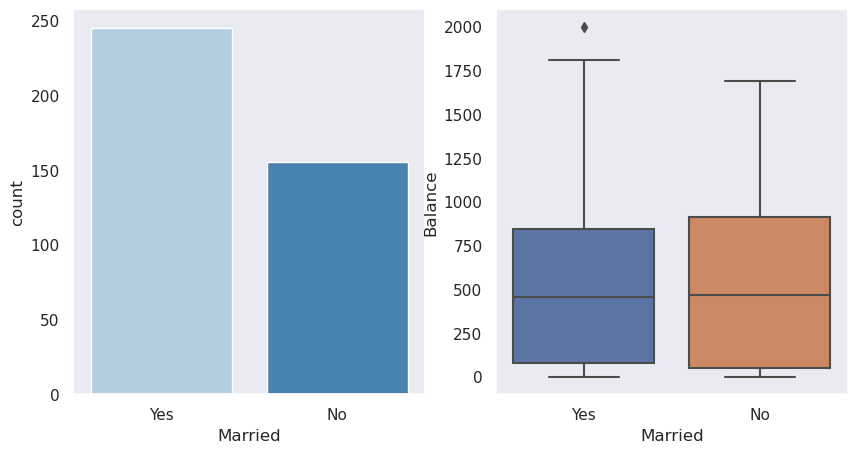

<IPython.core.display.Javascript object>

In [30]:
# Variável Married
sns.set_style("dark")

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.countplot(x="Married", data=credit_card, palette="Blues", ax=ax[0])
sns.boxplot(y="Balance", x="Married", data=credit_card, ax=ax[1])

plt.show()

Insights:
    
- Os solteiros possuem gastos no cartão um pouco mais elevados que os casados.

#### Variável Region

In [31]:
# Comparando a média de fatura entre as regiões
df.groupby("Region")["Balance"].mean()

Region
East     531.000000
South    518.497487
West     512.313725
Name: Balance, dtype: float64

<IPython.core.display.Javascript object>

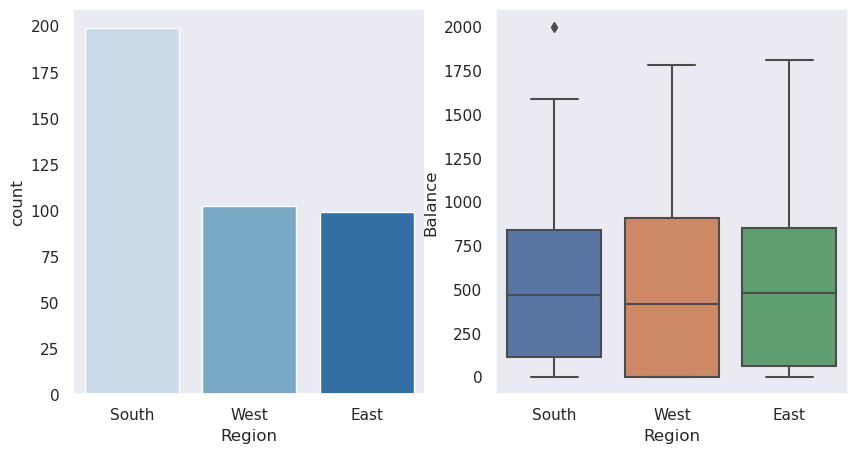

<IPython.core.display.Javascript object>

In [32]:
# Variável Region
sns.set_style("dark")

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.countplot(x="Region", data=credit_card, palette="Blues", ax=ax[0])
sns.boxplot(y="Balance", x="Region", data=credit_card, ax=ax[1])

plt.show()

Insights:
    
- Apesar do sul ser a região com mais registros, a região que possui a maior fatura média é o leste, seguido pelo sul e pelo oeste.

### Matriz de Correlação

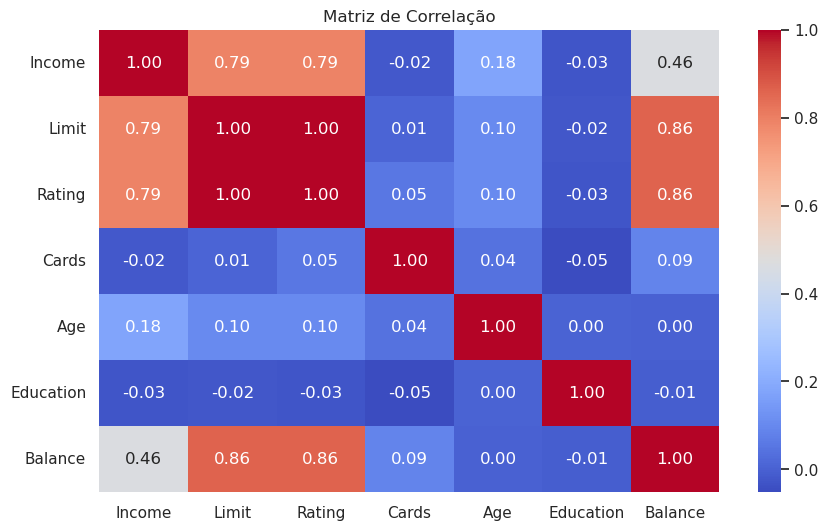

<IPython.core.display.Javascript object>

In [33]:
plt.figure(figsize=(10, 6))

corr = credit_card.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()



Insights:
    
- As variáveis Limit e Rating realmente possuem uma correlação extremamente forte entre elas.


- Ambas variável também possuem uma forte correlação positiva com a variável Balance.


- A variável Income possui uma correlação positiva considerável com a variável Balance.


- As variávels Cards, Age e Education não possuem ou possuem uma correlação muito fraca com a variável Balance.

## 05. Pré-Processamento

Vamos pré-processar as seguintes variáveis categóricas: Own, Student, Married, Region, Balance_value, faixa_etaria, faixa_educacao.

A variável Balance_value foi utilizada para compreendermos melhor os dados, mas será excluída para a etapada da modelagem da regressão. 

In [34]:
# Exlcuindo variável Balance_value
credit_card = credit_card.drop("Balance_value", axis=1)

<IPython.core.display.Javascript object>

#### Variável Own, Student, Married, Balance_value

In [35]:
credit_card["Own"] = [0 if each == "No" else 1 for each in credit_card["Own"]]
credit_card["Student"] = [0 if each == "No" else 1 for each in credit_card["Student"]]
credit_card["Married"] = [0 if each == "No" else 1 for each in credit_card["Married"]]

<IPython.core.display.Javascript object>

In [36]:
credit_card.head()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance,faixa_etaria,faixa_educacao
0,14.891,3606,283,2,34,11,0,0,1,South,333,adulto,medio_estudo
1,106.025,6645,483,3,82,15,1,1,1,West,903,terceira_idade,muito_estudo
2,104.593,7075,514,4,71,11,0,0,0,West,580,terceira_idade,medio_estudo
3,148.924,9504,681,3,36,11,1,0,0,West,964,adulto,medio_estudo
4,55.882,4897,357,2,68,16,0,0,1,South,331,terceira_idade,muito_estudo


<IPython.core.display.Javascript object>

#### Variável Region

Para a variáveis Region, faixa_etaria e faixa_educação vamos utilizar get_dummies.

In [37]:
# Criando as dummies
dummy_region = pd.get_dummies(credit_card["Region"], drop_first=True).rename(
    columns=lambda x: "Region_" + str(x)
)

dummy_faixa_etaria = pd.get_dummies(credit_card["faixa_etaria"], drop_first=True)

dummy_educacao = pd.get_dummies(credit_card["faixa_educacao"], drop_first=True).rename(
    columns=lambda x: "educacao_" + str(x)
)

# Concatenando as dummies ao dataframe
credit_card = pd.concat(
    [credit_card, dummy_region, dummy_faixa_etaria, dummy_educacao], axis=1
)

# Excluindo as variáveis origniais
credit_card = credit_card.drop(
    ["Age", "Region", "Education", "faixa_etaria", "faixa_educacao"], axis=1
)

<IPython.core.display.Javascript object>

## 06. Padronização de Dados

In [38]:
X = credit_card.drop("Balance", axis=1)
y = credit_card["Balance"]

scaler = StandardScaler()

X_transf = scaler.fit_transform(X)

credit_card_transform = pd.DataFrame(X_transf, columns=X.columns)

credit_card_transform["Balance"] = y
credit_card_transform

,Income,Limit,Rating,Cards,Own,Student,Married,Region_South,Region_West,jovem,terceira_idade,educacao_muito_estudo,educacao_pouco_estudo,Balance
0,-0.861583,-0.489999,-0.465539,-0.699130,-1.035635,-0.333333,0.795395,1.005013,-0.585049,-0.252646,-0.842260,-1.078036,-0.123404,333
1,1.727437,0.828261,0.828703,0.031032,0.965592,3.000000,0.795395,-0.995012,1.709260,-0.252646,1.187282,0.927613,-0.123404,903
2,1.686756,1.014787,1.029311,0.761194,-1.035635,-0.333333,-1.257237,-0.995012,1.709260,-0.252646,1.187282,-1.078036,-0.123404,580
3,2.946152,2.068440,2.110003,0.031032,0.965592,-0.333333,-1.257237,-0.995012,1.709260,-0.252646,-0.842260,-1.078036,-0.123404,964
4,0.302928,0.070012,0.013331,-0.699130,-1.035635,-0.333333,0.795395,1.005013,-0.585049,-0.252646,1.187282,0.927613,-0.123404,331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-0.940986,-0.275711,-0.310230,0.031032,-1.035635,-0.333333,0.795395,1.005013,-0.585049,-0.252646,-0.842260,-1.078036,-0.123404,560
396,-0.904963,-0.389362,-0.381413,1.491355,-1.035635,-0.333333,-1.257237,-0.995012,-0.585049,-0.252646,1.187282,0.927613,-0.123404,480
397,0.359462,-0.244913,-0.219633,1.491355,0.965592,-0.333333,0.795395,1.005013,-0.585049,-0.252646,1.187282,-1.078036,-0.123404,138
398,-0.212808,-0.958916,-1.054419,-1.429291,-1.035635,-0.333333,0.795395,1.005013,-0.585049,-0.252646,-0.842260,-1.078036,-0.123404,0


<IPython.core.display.Javascript object>

## 07. Modelo

### 7.1 Modelo Base

In [39]:
# Criando uma string para a formula
cols = credit_card_transform.columns.drop("Balance")
formula = "Balance ~ " + " + ".join(cols)
print(formula)

Balance ~ Income + Limit + Rating + Cards + Own + Student + Married + Region_South + Region_West + jovem + terceira_idade + educacao_muito_estudo + educacao_pouco_estudo


<IPython.core.display.Javascript object>

In [40]:
base_model = smf.ols(formula=formula, data=credit_card_transform)

base_res = base_model.fit()

print(base_res.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     630.1
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          1.29e-250
Time:                        15:29:47   Log-Likelihood:                -2399.1
No. Observations:                 400   AIC:                             4826.
Df Residuals:                     386   BIC:                             4882.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               520.01

<IPython.core.display.Javascript object>

Nosso modelo base está pronto. Agora vamos avaliar as premissas da regressão OLS para podermos melhorar nosso modelo base posteriormente.

## 8. Premissas da Regressão OLS - Linearidade

A premissa da linearidade assume que a relação entre as variáveis independentes numéricas e variável dependente é linear. Ou seja, as mudanças na variável dependentente estão linearmente relaciona às mudanças das variáveis indepentendes numéricas. Vamos conferir.

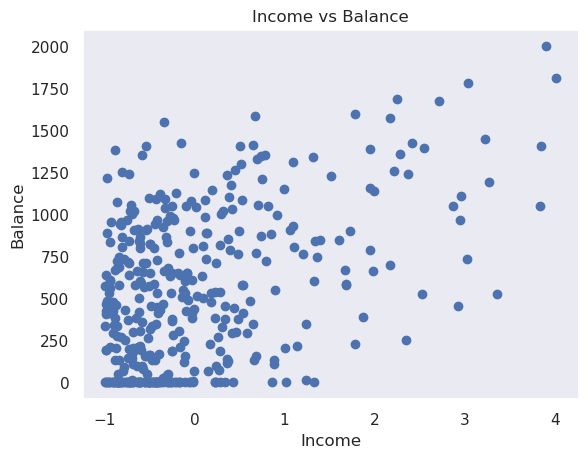

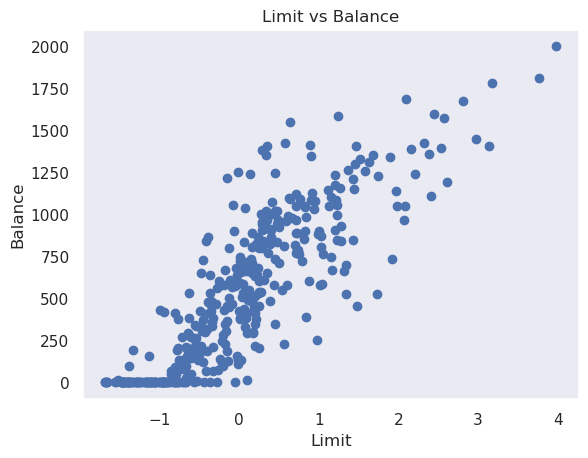

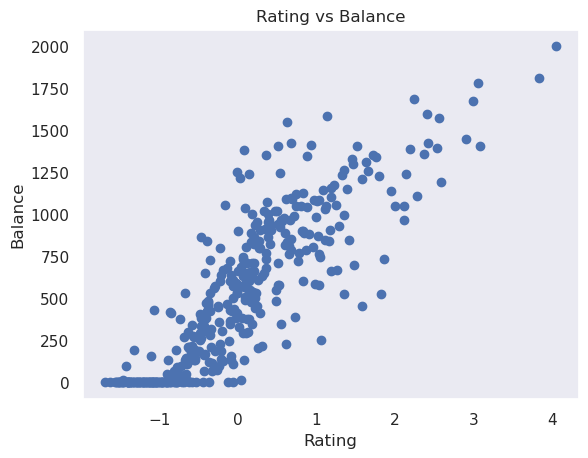

<IPython.core.display.Javascript object>

In [41]:
y = "Balance"
x = credit_card_transform[["Income", "Limit", "Rating"]]

for i in x:
    figure = plt.figure
    ax = plt.gca()
    ax.scatter(credit_card_transform[i], credit_card_transform[y])
    ax.set_xlabel(i)
    ax.set_ylabel(y)
    ax.set_title("{} vs {}".format(i, y))

    plt.show()

É possível perceber que todas as variáveis independentes numéricas do nosso modelo possuem uma relação linear com a variável dependente.

## 9. Premissas da Regressão OLS - Multicolinearidade

Para calcular a multicolienaridade entre as variáveis vamos utilizar o VIF, que avalia o quanto a variância de um coeficiente de regressão estimado aumenta se as suas preditoras estiverem correlacionadas. 

Não existe uma regre específica com relação aos valores do VIF, mas vou utilizar a seguinte abordagem:

VIF = 1: não há multicolinearidade entre os fatores.

VIF entre 1 e 5: indica alguma correlação, mas em geral não preocupante.

VIF entre 5 e 10: indica alta correlação, pode ser um problema para o modelo. 

VIF > 10: os coeficientes da regressão estão mal estimados devido à multicolinearidade.

In [42]:
X = credit_card_transform.drop("Balance", axis=1)
y = credit_card_transform["Balance"]

<IPython.core.display.Javascript object>

In [43]:
# Calculando o VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Variaveis"] = X.columns
vif

,VIF,Variaveis
0,2.787325,Income
1,234.228865,Limit
2,236.066247,Rating
3,1.447754,Cards
4,1.019247,Own
5,1.031787,Student
6,1.037576,Married
7,1.536810,Region_South
8,1.551202,Region_West
9,1.079841,jovem


<IPython.core.display.Javascript object>

Realmente as variáveis Limit e Rating possuem uma alta correlação, então vamos excluir uma delas para melhorar o nosso modelo.

In [44]:
# Excluindo a variável Rating
credit_card_transform = credit_card_transform.drop("Rating", axis=1)

<IPython.core.display.Javascript object>

In [45]:
X = credit_card_transform.drop("Balance", axis=1)
y = credit_card_transform["Balance"]

# Calculando novamente o VIF
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["variable"] = X.columns
vif

,VIF,variable
0,2.774655,Income
1,2.723583,Limit
2,1.009343,Cards
3,1.019245,Own
4,1.023074,Student
5,1.025700,Married
6,1.536696,Region_South
7,1.545198,Region_West
8,1.079553,jovem
9,1.072431,terceira_idade


<IPython.core.display.Javascript object>

Agora sim todos as variáveis possuem um valor de VIF abaixo de 3, desta forma é possível concuir que é baixa a multicolinearidade entre as variáveis independentes, não afetando no desempenho do modelo.

Vamos criar um novo modelo excluindo estas variáveis.

In [46]:
cols = credit_card_transform.columns
formula = "Balance ~ " + " + ".join(cols)

modelo = smf.ols(formula=formula, data=credit_card_transform)
res = modelo.fit()

<IPython.core.display.Javascript object>

### 10. Premissas da Regressão OLS - Homocedasticidade

A homocedasticidade é uma característica de um modelo de regressão liniear que implica que a variância dos erros é constante ao longo do tempo. Quanto mais próximo de 0 se encontra a média dos resíduos, melhor tende a ser a homocedasticidade.

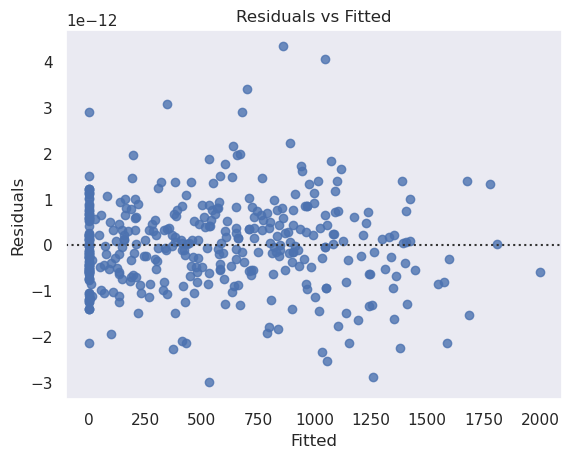

<IPython.core.display.Javascript object>

In [47]:
# Calculando a Homocedasticidade
y = credit_card_transform["Balance"]
fig, ax = plt.subplots(1, 1)

sns.residplot(res.fittedvalues, res.resid)
ax.title.set_text("Residuals vs Fitted")
ax.set(xlabel="Fitted", ylabel="Residuals")

plt.show()

In [48]:
# Tentando melhorar a Homocedasticidade

# Raiz de y
#credit_card_transform["raiz_balance"] = credit_card_transform["Balance"] ** (1 / 2)


<IPython.core.display.Javascript object>

In [49]:
# Deleta balance
# credit_card_transform = credit_card_transform.drop("Balance", axis=1)

<IPython.core.display.Javascript object>

In [50]:
# cols = credit_card_transform.columns
# formula = "raiz_balance ~ " + " + ".join(cols)

# modelo = smf.ols(formula=formula, data=credit_card_transform)
# res = modelo.fit()

<IPython.core.display.Javascript object>

In [51]:
# Calculando a Homocedasticidade
# y = credit_card_transform["raiz_balance"]
# fig, ax = plt.subplots(1, 1)

# sns.residplot(res.fittedvalues, res.resid)
# ax.title.set_text("Residuals vs Fitted")
# ax.set(xlabel="Fitted", ylabel="Residuals")

# plt.show()

<IPython.core.display.Javascript object>

In [52]:
# log de 10

<IPython.core.display.Javascript object>

In [53]:
credit_card_transform["log_balance"] = np.log10(credit_card_transform["Balance"])

with np.errstate(divide="ignore"):
    credit_card_transform["log_balance"] = np.log10(
        credit_card_transform["log_balance"]
    )

<IPython.core.display.Javascript object>

In [54]:
credit_card_transform = credit_card_transform.drop("Balance", axis=1)

<IPython.core.display.Javascript object>

In [55]:
cols = credit_card_transform.columns
formula = "log_balance ~ " + " + ".join(cols)

modelo = smf.ols(formula=formula, data=credit_card_transform)
res = modelo.fit()

<IPython.core.display.Javascript object>

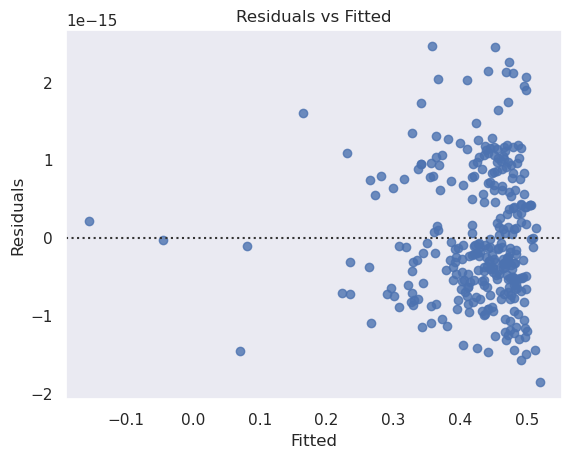

<IPython.core.display.Javascript object>

In [56]:
# Calculando a log_balance
y = credit_card_transform["log_balance"]
fig, ax = plt.subplots(1, 1)

sns.residplot(res.fittedvalues, res.resid)
ax.title.set_text("Residuals vs Fitted")
ax.set(xlabel="Fitted", ylabel="Residuals")

plt.show()

In [57]:
# Analisando a média dos resíduos
res.resid.mean()

-3.6165067356590027e-16

<IPython.core.display.Javascript object>

Apesar do ponto 0 apresentar certo padrão nos resíduos, as demais osbervações aparentam estar mais disperas, sem qualquer tipo de aparente padrão. Além disso, a média dos resíduos se encontra bem próxima de 0.

Obs: Foi tentato transformar a variável dependente em uma base logarítmica para tentar melhorar a homocedasticidade, mas o resultado foi contrário e acabou provocando uma hetecedasticidade bem aparente.

### 11. Premissas da Regressão OLS - Resíduo versus variável independente

Essa premissa parte do princípio que não deve haver uma correlação entre os resíduos e as variáveis independentes numéricas.

Depois de excluír algumas variáveis do dataset, apenas a variável Income é numérica.

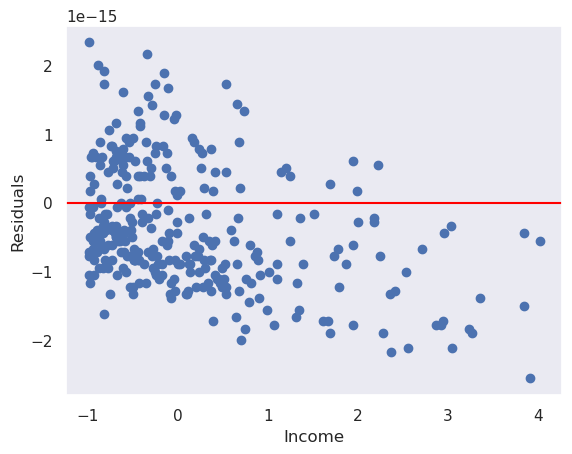

<IPython.core.display.Javascript object>

In [58]:
# Analisando a correlação entre a variável Income e os resíduos
df_resid = pd.DataFrame(credit_card_transform["Income"])
df_resid["residuo"] = res.resid

plt.scatter(df_resid["Income"], df_resid["residuo"])
plt.axhline(0, color="red")
plt.xlabel("Income")
plt.ylabel("Residuals")

plt.show()

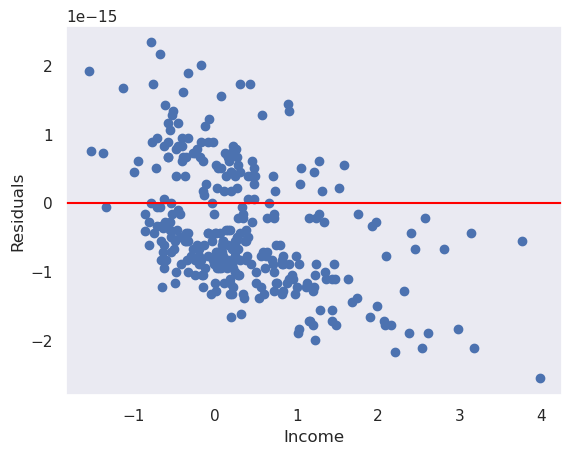

<IPython.core.display.Javascript object>

In [59]:
# Analisando a correlação entre a variável Income e os resíduos
df_resid = pd.DataFrame(credit_card_transform["Limit"])
df_resid["residuo"] = res.resid

plt.scatter(df_resid["Limit"], df_resid["residuo"])
plt.axhline(0, color="red")
plt.xlabel("Income")
plt.ylabel("Residuals")

plt.show()

Não parece haver uma correlação entre a variável independente e os resíduos.

### 12. Premissas da Regressão OLS - Autocorreção do resíduo

A premissa da autocorrelação do resíduo afirma que a observação de um resíduo não deve prever a próxima observação. Isso é claramente percebido quando o gráfico da autocorrelação possui um padrão identificado. 

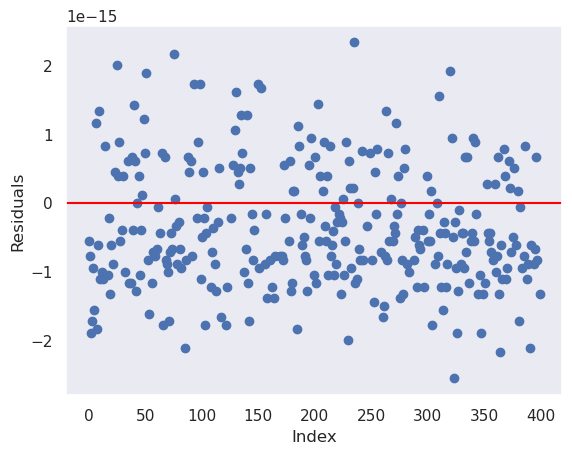

<IPython.core.display.Javascript object>

In [60]:
# Analisando a autocorrelação dos resíduos
autocorrelacao = res.resid.reset_index().rename(columns={0: "resid"})
plt.scatter(autocorrelacao["index"], autocorrelacao["resid"])
plt.axhline(0, color="red")
plt.xlabel("Index")
plt.ylabel("Residuals")

plt.show()

Os resídios parecem estar dispersos de uma maneira que não aparecenta haver qualquer padrão entre eles. 

In [61]:
# Aplicando o teste de durbin_watson para confirmar que não existe autocorrelação
durbin_watson(res.resid)

1.6700088265182966

<IPython.core.display.Javascript object>

Se o valor ficar entre 1 e 3 é possível afirmar que realmente não existe uma autocorrelação.

### 13. Premissas da Regressão OLS - Distribuição normal dos resíduos

A premissa da distribuição normal afirma que os resíduos devem ter uma distribuição normal, para realizar esta avaliação utilizamos o gráfico QQ Plot.

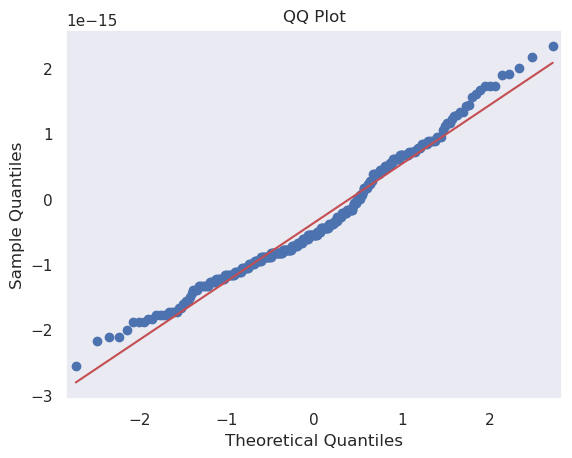

<IPython.core.display.Javascript object>

In [62]:
fig, ax = plt.subplots(1, 1)
sm.ProbPlot(res.resid).qqplot(line="s", ax=ax)
ax.title.set_text("QQ Plot")

O gráfico QQ Plot não demonstra uma normalidade perfeita, a distribuição foge da normalidade principalmente nos extremos do gráfico. Mas no geral ele parece se aproximar de uma distribuição normal.

### 14. Melhorando o modelo base

Já que conseguimos atender as premissas de uma regressão OLS, vamos melhorar o modelo levando em consideração os p-valores das variáveis. Aquelas variáveis que apresentaram p-valores menor que 0.05 no modelo base, serão excluídas.

In [63]:
# Excluindo variáveis com p-valor maior que 0.05
cols = credit_card_transform.columns.drop(
    [
        "log_balance",
        "Own",
        "Married",
        "Region_West",
        "jovem",
        "terceira_idade",
        "educacao_muito_estudo",
        "educacao_pouco_estudo",
        "Region_South",
    ]
)
formula = "log_balance ~ " + " + ".join(cols)
formula

'log_balance ~ Income + Limit + Cards + Student'

<IPython.core.display.Javascript object>

In [64]:
# Construindo o modelo
modelo = smf.ols(formula=formula, data=credit_card_transform)
res = modelo.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            log_balance   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     122.5
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           3.41e-62
Time:                        15:29:48   Log-Likelihood:                 494.65
No. Observations:                 310   AIC:                            -979.3
Df Residuals:                     305   BIC:                            -960.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3931      0.003    124.040      0.0

<IPython.core.display.Javascript object>

### 15. Interpretação do Modelo e Insights de Negócio 


- O modelo foi finalizado com um ótimo R-quadrado ajustado: 0.953.


- A variável que mais possui relevância no valor da fatura do cartão de crédito dos clientes é o limite dado pelo banco. Podemos afirmar que para que para cada aumento em uma unidade do limite, o valor da fatura do cartão aumenta em 614.69, dado que todas as demais variáveis se mantenham constantes.


- A segunda variável que mais possui impacto no valor da fatura do cartão de crédito dos clientes é a renda. Ao final do modelo é possível cocluir que a cada aumento de uma unidade da renda o valor da fatura do cartão de crédito diminui em 275.94, dado que todas as demais variáveis se mantenham constantes. 


- A terceira variável que possui mais impacto no valor da fatura é o fato do cliente ser estudante ou não. A cada aumento em uma unidade da variável, o valor da fatura aumenta em 128.88, dado que todas as demais variáveis se mantenham constantes. 


- A quarta variável que mais possui impacto é o número de cartões que o cliente possui, a cada aumento em uma unidade da variável, o valor da fatura do cartão aumenta em 31.74, dado que as demais variáveis se mantenham constantes. 

### 16. Conclusão


Após criar o primeiro modelo (modelo base), foi analisado todas as premissas de uma regressão linear. Concluindo que o modelo respeitava todas as premissas, foi criado um segundo modelo levando em consideração apenas as variáveis que respeitavam um p-valor abaixo de 0.05, dando significância estatística para o noso modelo final.

O segundo modelo não obteve o R-quadrado ajustado melhor que o modelo base, se manteve o mesmo, mas envolveu apenas 4 variáveis independentes, enquanto o modelo base envolvia 14 variáveis independentes, o que com certeza significa um ganho de desempenho computacional. 